# Kmeans

In [0]:
import os, sys
import argparse
import numpy as np
import time
import matplotlib.pyplot as plt

In [0]:
np.random.seed(42)
# Sample data points from three different Gaussians.
u1, u2, u3 = np.asarray([1.0, 1.0]), np.asarray([-1.0, 1.0]), np.asarray([5.0, 5.0])
sigma1, sigma2, sigma3 = np.random.rand(2, 2), np.random.rand(2, 2), np.random.rand(2, 2)
sigma1 = np.dot(sigma1, sigma1.T) * 1.0
sigma2 = np.dot(sigma2, sigma2.T) * 5.0
sigma3 = np.dot(sigma3, sigma3.T) * 2.0

num_pts = 100
samples1 = np.random.multivariate_normal(u1, sigma1 * np.ones((2, 2)), size=num_pts)
samples2 = np.random.multivariate_normal(u2, sigma2 * np.ones((2, 2)), size=num_pts)
samples3 = np.random.multivariate_normal(u3, sigma3 * np.ones((2, 2)), size=num_pts)

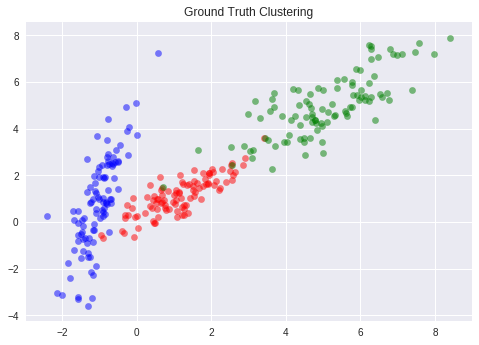

In [6]:
# Plot for visualization.
plt.figure()
plt.scatter(samples1[:, 0], samples1[:, 1], s=40, c="r", alpha=0.5)
plt.scatter(samples2[:, 0], samples2[:, 1], s=40, c="b", alpha=0.5)
plt.scatter(samples3[:, 0], samples3[:, 1], s=40, c="g", alpha=0.5)
plt.grid(True)
plt.title("Ground Truth Clustering")
# plt.savefig("./examples/clustering_{}.pdf".format(args.seed), bbox_inches="tight")
plt.show()

# 手写kmeans

## 随机初始化

In [14]:
samples1

array([[ 1.33850759,  1.5671852 ],
       [ 1.57075368,  1.30128828],
       [ 1.21158179,  0.28579414],
       [ 2.84766744,  2.42391275],
       [ 1.93262754,  2.00250446],
       [ 2.23643392,  1.46128799],
       [-0.40369402, -0.39157583],
       [ 1.26954792,  0.57063483],
       [ 1.5149758 ,  1.5238589 ],
       [ 2.05545781,  2.14405737],
       [ 1.66604317,  1.47105952],
       [ 1.1604665 ,  2.02570416],
       [ 1.26336387,  0.73912803],
       [ 0.4707781 , -0.06353039],
       [ 1.25544852,  0.30392329],
       [ 2.27387095,  2.25906167],
       [ 0.22537176,  0.37248772],
       [ 1.18612284,  1.02744385],
       [ 2.63994965,  2.15908318],
       [ 1.20812853,  1.69203149],
       [ 1.07501941,  0.23211877],
       [ 0.76881622,  0.60574148],
       [ 1.52840495,  1.77374496],
       [-0.24501776,  0.30262119],
       [ 1.90736158,  1.68356555],
       [ 0.44015137,  0.9505877 ],
       [ 1.5202347 ,  1.38794896],
       [ 2.3825154 ,  1.69749356],
       [-0.12824784,

In [13]:
samples.shape

(300, 2)

In [0]:
# Vanilla K-means clustering.
samples = np.vstack([samples1, samples2, samples3])
rorder = np.arange(num_pts * 3)
rorder = np.random.shuffle(rorder)
samples = samples[rorder, :].squeeze()

In [8]:
# Lloyd's algorithm, with random initialization.
k = 3
centers = np.random.rand(k, 2)
centers

array([[0.75903585, 0.72410333],
       [0.63723158, 0.9805768 ],
       [0.90336381, 0.64666492]])

In [0]:
num_iters = 10
losses = []
# Save for repeated use.
xdist = np.sum(samples * samples, axis=1)
for _ in range(num_iters):
    # Compute distance to each center.
    cdist = np.sum(centers * centers, axis=1)
    consts = xdist[:, np.newaxis] + cdist
    dists = consts - 2 * np.dot(samples, centers.T)
    # Compute cluster assignment.
    ids = np.argmin(dists, axis=1)
    losses.append(np.sum(np.min(dists, axis=1)))
    for i in range(k):
        centers[i, :] = np.mean(samples[ids == i], axis=0)


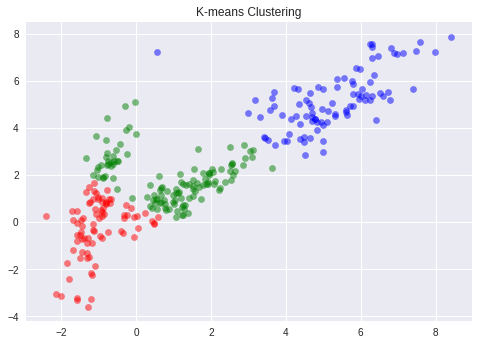

In [10]:
plt.figure()
colors = ["r", "b", "g"]
for i in range(k):
    plt.scatter(samples[ids == i, 0], samples[ids == i, 1], c=colors[i], s=40, alpha=0.5)
plt.grid(True)
plt.title("K-means Clustering")
# plt.savefig("./examples/kmeans_{}.pdf".format(args.seed), bbox_inches="tight")
plt.show()

## kmeans++初始化

In [0]:
sample2=np.array([[1,1]
                 ,[1,2]
                 ,[-1,-1]
                 ,[-1,-2]
                 ,[6,6]
                 ,[6,5]
                 ,[6,-6]])

In [21]:
sample2.shape

(7, 2)

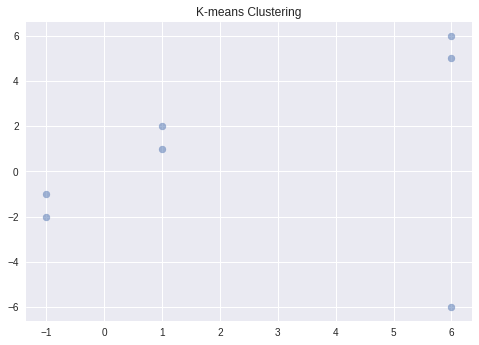

In [25]:
plt.figure()
plt.scatter(sample2[:,0],sample2[:,1], alpha=0.5)
plt.grid(True)
plt.title("K-means Clustering")
# plt.savefig("./examples/kmeans_{}.pdf".format(args.seed), bbox_inches="tight")
plt.show()

In [0]:
def kmean(samples):
    num_iters = 10
    losses = []
    # Save for repeated use.
    xdist = np.sum(samples * samples, axis=1)
    for _ in range(num_iters):
        # Compute distance to each center.
        cdist = np.sum(centers * centers, axis=1)
        consts = xdist[:, np.newaxis] + cdist
        dists = consts - 2 * np.dot(samples, centers.T)
        # Compute cluster assignment.
        ids = np.argmin(dists, axis=1)
        losses.append(np.sum(np.min(dists, axis=1)))
        for i in range(k):
            centers[i, :] = np.mean(samples[ids == i], axis=0)
    return ids ,centers

In [0]:
ids,centers = kmean(sample2)

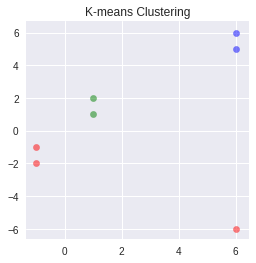

In [30]:
plt.figure(figsize=(4,4))
colors = ["r", "b", "g"]
for i in range(k):
    plt.scatter(sample2[ids == i, 0], sample2[ids == i, 1], c=colors[i], s=40, alpha=0.5)
plt.grid(True)
plt.title("K-means Clustering")
# plt.savefig("./examples/kmeans_{}.pdf".format(args.seed), bbox_inches="tight")
plt.show()

In [0]:
n_samples, n_features = sample2.shape
centers2 = np.empty((k, n_features))

In [0]:
# n_local_trials是每次选择候选点个数
n_local_trials = 2 + int(np.log(k))

# 第一个随机点
center_id = np.random.randint(n_samples)
centers2[0] = sample2[center_id]

In [45]:
sample2[center_id]

array([6, 6])

In [46]:
centers2

array([[6., 6.],
       [2., 4.],
       [6., 8.]])

In [0]:
def distance(point1, point2):
    # 欧氏距离
    return np.sqrt(np.sum(np.square(point1 - point2), axis=1))

In [0]:
# closest_dist_sq是每个样本，到所有中心点最近距离
# 假设现在有3个中心点，closest_dist_sq = [min(样本1到3个中心距离),min(样本2到3个中心距离),...min(样本n到3个中心距离)]
closest_dist_sq = distance(centers2[0, np.newaxis], sample2)
# newaxis可以给原数组增加一个维度

In [49]:
closest_dist_sq

array([ 7.07106781,  6.40312424,  9.89949494, 10.63014581,  0.        ,
        1.        , 12.        ])

In [50]:
# current_pot所有最短距离的和
current_pot = closest_dist_sq.sum()
current_pot

47.00383279864464

In [51]:
n_local_trials

3

In [0]:
def check_random_state(seed):
    if seed is None or seed is np.random:
        return np.random.mtrand._rand
    if isinstance(seed, (numbers.Integral, np.integer)):
        return np.random.RandomState(seed)
    if isinstance(seed, np.random.RandomState):
        return seed
    raise ValueError('%r cannot be used to seed a numpy.random.RandomState'
                     ' instance' % seed)

In [0]:
random_state = check_random_state(None)

In [56]:
random_state

In [62]:
help(random_state.random_sample)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

In [58]:
# 选出n_local_trials随机址，并映射到current_pot的长度
rand_vals = random_state.random_sample(n_local_trials) * current_pot
rand_vals

array([46.9734448 , 26.12503962, 22.24268927])

In [61]:
np.cumsum(closest_dist_sq)

array([ 7.07106781, 13.47419205, 23.37368699, 34.0038328 , 34.0038328 ,
       35.0038328 , 47.0038328 ])

In [0]:
# np.cumsum([1,2,3,4]) = [1, 3, 6, 10]，就是累加当前索引前面的值
# np.searchsorted搜索随机出的rand_vals落在np.cumsum(closest_dist_sq)中的位置。
# candidate_ids候选节点的索引
candidate_ids = np.searchsorted(np.cumsum(closest_dist_sq), rand_vals)

In [60]:
candidate_ids

array([6, 3, 2])

In [63]:
sample2[candidate_ids[0], np.newaxis]

array([[ 6, -6]])

In [64]:
sample2[candidate_ids[0]]

array([ 6, -6])

In [0]:
distance_to_candidate = distance(sample2[candidate_ids[0], np.newaxis], sample2)

In [66]:
distance_to_candidate

array([ 8.60232527,  9.43398113,  8.60232527,  8.06225775, 12.        ,
       11.        ,  0.        ])

In [69]:
closest_dist_sq

array([ 7.07106781,  6.40312424,  9.89949494, 10.63014581,  0.        ,
        1.        , 12.        ])

In [0]:
# 计算每个候选节点的距离序列new_dist_sq， 距离总和new_pot
new_dist_sq = np.minimum(closest_dist_sq, distance_to_candidate)

In [68]:
new_dist_sq

array([7.07106781, 6.40312424, 8.60232527, 8.06225775, 0.        ,
       1.        , 0.        ])

In [0]:
new_pot = new_dist_sq.sum()


In [0]:

# 选择最小的new_pot
if (best_candidate is None) or (new_pot < best_pot):
    best_candidate = candidate_ids[trial]
    best_pot = new_pot
    best_dist_sq = new_dist_sq

In [0]:

# best_candidate最好的候选节点
# best_pot最好的候选节点计算出的距离和
# best_dist_sq最好的候选节点计算出的距离列表
best_candidate = None
best_pot = None
best_dist_sq = None
for trial in range(n_local_trials):
    # 计算每个样本到候选节点的欧式距离
    distance_to_candidate = distance(sample2[candidate_ids[trial], np.newaxis], sample2)

    # 计算每个候选节点的距离序列new_dist_sq， 距离总和new_pot
#   closest_dist_sq 每个样本，到所有已知的中心点的距离
#   new_dist_sq 每个样本，到所有中心点最近距离
# 如果中心点变成了两个，那么样本到中心点的最近距离就可能会发生变化
    new_dist_sq = np.minimum(closest_dist_sq, distance_to_candidate)
    new_pot = new_dist_sq.sum()

    # 选择最小的new_pot
    if (best_candidate is None) or (new_pot < best_pot):
        best_candidate = candidate_ids[trial]
        best_pot = new_pot
        best_dist_sq = new_dist_sq

选择出来的候选节点是按照概率选择出来的

然后再根据所有样本到(已知中心点+候选节点)的距离选择出来最合适的候选节点

In [0]:
def _k_means_plus_plus(dataset,k):
    n_samples, n_features = dataset.shape
    centers = np.empty((k, n_features))
    random_state = check_random_state(None)
    # n_local_trials是每次选择候选点个数
    n_local_trials = None
    if n_local_trials is None:
        n_local_trials = 2 + int(np.log(k))



    # 第一个随机点
    center_id = random_state.randint(n_samples)
    centers[0] = dataset[center_id]

    # closest_dist_sq是每个样本，到所有中心点最近距离
    # 假设现在有3个中心点，closest_dist_sq = [min(样本1到3个中心距离),min(样本2到3个中心距离),...min(样本n到3个中心距离)]
    closest_dist_sq = distance(centers[0, np.newaxis], dataset)
    # newaxis可以给原数组增加一个维度

    # current_pot所有最短距离的和
    current_pot = closest_dist_sq.sum()

    for c in range(1, k):
        # 选出n_local_trials随机址，并映射到current_pot的长度
        rand_vals = random_state.random_sample(n_local_trials) * current_pot
        # 选择出来的候选节点是按照概率选择出来的
        # 然后再根据所有样本到候选节点的距离选择出来距离最小的节点



        # np.cumsum([1,2,3,4]) = [1, 3, 6, 10]，就是累加当前索引前面的值
        # np.searchsorted搜索随机出的rand_vals落在np.cumsum(closest_dist_sq)中的位置。
        # candidate_ids候选节点的索引
        candidate_ids = np.searchsorted(np.cumsum(closest_dist_sq), rand_vals)

        # best_candidate最好的候选节点
        # best_pot最好的候选节点计算出的距离和
        # best_dist_sq最好的候选节点计算出的距离列表
        best_candidate = None
        best_pot = None
        best_dist_sq = None
        for trial in range(n_local_trials):
            # 计算每个样本到候选节点的欧式距离
            distance_to_candidate = distance(dataset[candidate_ids[trial], np.newaxis], dataset)

            # 计算每个候选节点的距离序列new_dist_sq， 距离总和new_pot

            #   closest_dist_sq 每个样本，到所有已知的中心点的距离
            #   new_dist_sq 每个样本，到所有中心点（已知的中心点+当前的候选点）最近距离
            # 如果中心点变成了两个，那么样本到中心点的最近距离就可能会发生变化
            new_dist_sq = np.minimum(closest_dist_sq, distance_to_candidate)
            new_pot = new_dist_sq.sum()

            # 选择最小的new_pot
            if (best_candidate is None) or (new_pot < best_pot):
                best_candidate = candidate_ids[trial]
                best_pot = new_pot
                best_dist_sq = new_dist_sq

        centers[c] = dataset[best_candidate]
        current_pot = best_pot
        closest_dist_sq = best_dist_sq

    return centers

In [72]:
_k_means_plus_plus(sample2,3)

array([[ 6., -6.],
       [ 1.,  1.],
       [ 6.,  5.]])

In [73]:
sample2 * sample2

array([[ 1,  1],
       [ 1,  4],
       [ 1,  1],
       [ 1,  4],
       [36, 36],
       [36, 25],
       [36, 36]])

## # 计算样本点到中心点的欧式距离 (a-b)**2=a^2+b^2-2*ab

In [0]:
xdist2 = np.sum(sample2 * sample2, axis=1)

In [75]:
xdist2
# a^2

array([ 2,  5,  2,  5, 72, 61, 72])

In [0]:
centers = _k_means_plus_plus(sample2,3)

In [77]:
centers


array([[ 1.,  2.],
       [ 6.,  6.],
       [ 6., -6.]])

In [78]:
# Compute distance to each center.
cdist = np.sum(centers * centers, axis=1)
cdist
# b^2

array([ 5., 72., 72.])

In [81]:
xdist2[:, np.newaxis]

array([[ 2],
       [ 5],
       [ 2],
       [ 5],
       [72],
       [61],
       [72]])

In [80]:
consts = xdist2[:, np.newaxis] + cdist
consts
# a^2+b^2

array([[  7.,  74.,  74.],
       [ 10.,  77.,  77.],
       [  7.,  74.,  74.],
       [ 10.,  77.,  77.],
       [ 77., 144., 144.],
       [ 66., 133., 133.],
       [ 77., 144., 144.]])

In [82]:
dists = consts - 2 * np.dot(sample2, centers.T)
dists
# # a^2+b^2-2ab

array([[  1.,  50.,  74.],
       [  0.,  41.,  89.],
       [ 13.,  98.,  74.],
       [ 20., 113.,  65.],
       [ 41.,   0., 144.],
       [ 34.,   1., 121.],
       [ 89., 144.,   0.]])

In [83]:
# Compute cluster assignment.
ids = np.argmin(dists, axis=1)
ids

array([0, 0, 0, 0, 1, 1, 2])

In [0]:
losses.append(np.sum(np.min(dists, axis=1)))
losses

In [0]:
for i in range(k):
    centers[i, :] = np.mean(sample2[ids == i], axis=0)

In [86]:
centers

array([[ 0. ,  0. ],
       [ 6. ,  5.5],
       [ 6. , -6. ]])